## Basic testing of the ImportanceModel against known ground truth

### 1. Install local version of rocketpy and import modules

To test the functionality of SensitivityModel, we need to install its 
dependencies. We can either install rocketpy using the '[sensitivity]'
modifier, or install the required packages directly

In [1]:
#!python3 -m pip install -e <path_to_local_rocketpy>[sensitivity]
!python3 -m pip install rocketpy statsmodels prettytable

Obtaining file:///home/lprates/Desktop/Work/RocketPy/RocketPy
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
Checking if build backend supports build_editable ... done
  Building editable for rocketpy (pyproject.toml) ... done
  Created wheel for rocketpy: filename=rocketpy-1.2.1-0.editable-py3-none-any.whl size=9630 sha256=df78cc09dee93dd334dfec58a1af1f760a58f12bf29267f1511f9e7990b39fe1
  Stored in directory: /tmp/pip-ephem-wheel-cache-camyftw5/wheels/0c/a3/11/cee13d6a06f91f5f75156a63cecde4fce7b0059247afac9d5b
Successfully built rocketpy
  Attempting uninstall: rocketpy
    Found existing installation: rocketpy 1.2.1
    Uninstalling rocketpy-1.2.1:
      Successfully uninstalled rocketpy-1.2.1


In [2]:
from rocketpy import SensitivityModel
from rocketpy import load_monte_carlo_data
import numpy as np

### 2. Extracting input and output parameters from MonteCarlo simulation 

We consider only a few parameters and target variables for the usage
example. We import the data obtained 
from a Monte Carlo simulation.

First we setup the variables we are interest in, then we call 
'load_monte_carlo_data' to build the matrices used to fit the model

In [15]:
parameters = [
    "mass",
    "wind_velocity_x_factor",
    "wind_velocity_y_factor",
    "motors_total_impulse",
    "motors_grain_density",
    "inclination",
    "heading",
    "parachutes_cd_s",
    "parachutes_lag",
]
target_variables = [
    "apogee",
    "apogee_time",
    "x_impact",
    "y_impact",
]

parameters_matrix, target_variables_matrix = load_monte_carlo_data(
    input_filename="monte_carlo_analysis_outputs/sensitivity_class_example.inputs.txt",
    output_filename="monte_carlo_analysis_outputs/sensitivity_class_example.outputs.txt",
    parameters_list=parameters,
    target_variables_list=target_variables,
)

### 3. Creating and fitting SensitivityModel

We pass the parameters list and target variables list to the SensitivityModel
object in order to create it.

In [16]:
model = SensitivityModel(parameters, target_variables)

If we know the nominal values for the parameters and target variables in the
simulation, we can pass them using the methods "set_parameters_nominal" and
"set_target_variables_nominal". If we do not pass it to the model, the fit method
estimates them from data. In this example, we will pass the nominal vlaues only for the
parameters and let the method estimate the nominals for the target variables.

In [18]:
parameters_nominal_mean = np.array([14.426, 1, 1, 6500, 1815, 84.7, 53, 10, 1.5])
parameters_nominal_sd = np.array([0.5, 0.33, 0.33, 50, 10, 1, 2, 0.1, 0.1])
model.set_parameters_nominal(parameters_nominal_mean, parameters_nominal_sd)

Finally, we fit the model by passing the parameters and target
variables matrices loaded previously.

In [19]:
model.fit(parameters_matrix, target_variables_matrix)

### 4. Results

We provide a "plot" and "summary" method to display the results.

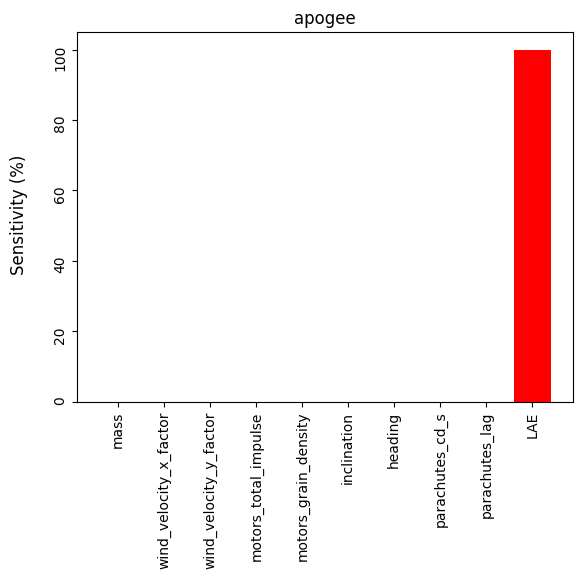

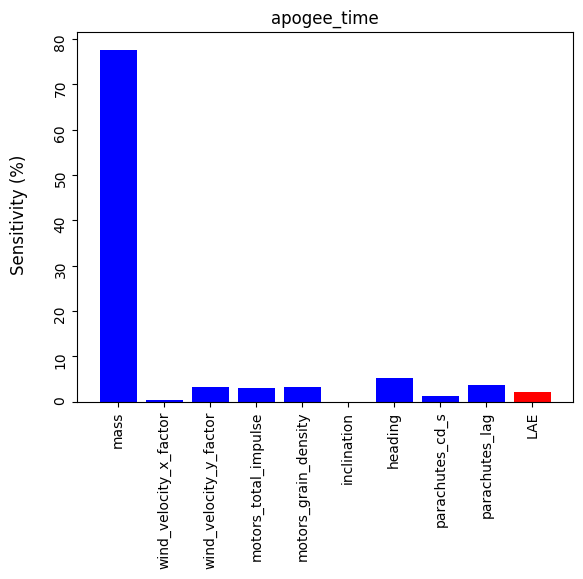

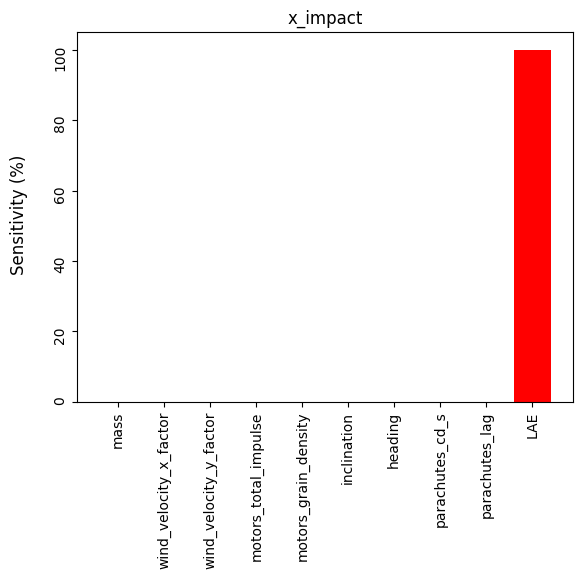

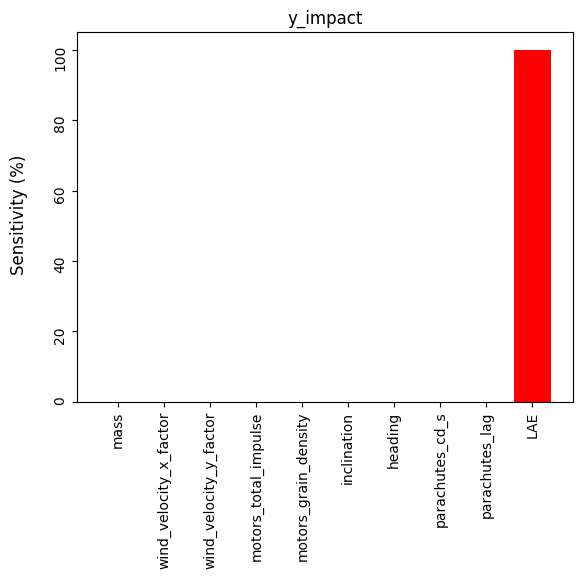

In [23]:
model.plot()

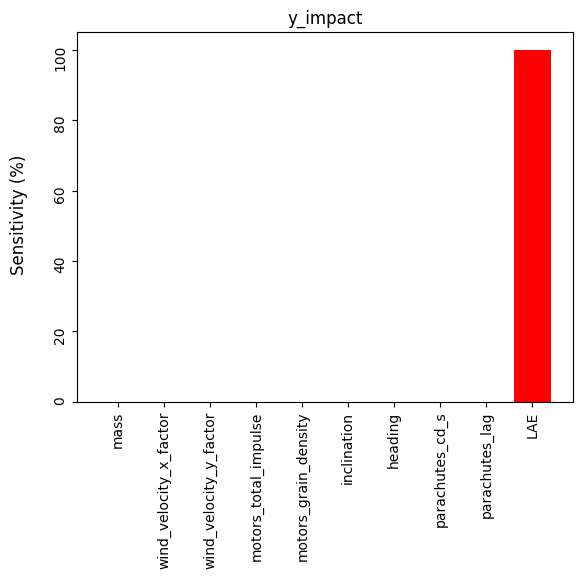

In [24]:
model.plot("y_impact")

In [25]:
model.summary()

+-------------------------------------------------------------------------------------------------------------+
|                                                Summary apogee                                               |
+----------------------------+-----------------+--------------+------------+------------------------+---------+
|         Parameter          | Sensitivity (%) | Nominal mean | Nominal sd | Regression Coefficient | p-value |
+----------------------------+-----------------+--------------+------------+------------------------+---------+
| Linear Approx. Error (LAE) |     99.9592     |              |            |                        |         |
|            mass            |      0.0364     |    14.426    |    0.5     |       -193.6873        |   0.0   |
|    motors_total_impulse    |      0.0014     |    6500.0    |    50.0    |         0.3845         |  0.1321 |
|    motors_grain_density    |      0.0014     |    1815.0    |    10.0    |        -1.9293         |  0